# Notebook to analyse Diamond dataset in detail

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Diamond data overview

In [89]:
df=pd.read_csv('./data/diamonds_train.csv')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


In [90]:
# General description dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   price    40455 non-null  int64  
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [91]:
# Now we check columns, rows and nulls
print(f'Dimensions =>> {df.shape}\n')
print(f'Columns =>> {df.columns}\n')
print(f'Rows/Index =>> {df.index}\n')
print(f'No nulls values in data frame \n{df.isnull().sum()}')


Dimensions =>> (40455, 10)

Columns =>> Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

Rows/Index =>> RangeIndex(start=0, stop=40455, step=1)

No nulls values in data frame 
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


## There is no nulls values

# Variables & Description
#### carat   ==>> weight of the diamond [0.2–4.5]
#### cut     ==>> quality of the cut [Fair, Good, Very Good, Premium, Ideal]
#### color   ==>> diamond colour, from J (worst) to D (best)
#### clarity ==> a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
#### depth   ==> the height of a diamond = z / mean(x, y) = 200 * z / (x + y) [43–79]
#### table   ==> width of top of diamond relative to widest point [43–95]
#### price   ==> price in US dollars [326 – 18,823]
#### x       ==> length in mm [0–10.74]
#### y       ==> width in mm [0–58.9]
#### z       ==> depth in mm [0–31.8]

In [92]:
# General statistics for numerical columns in dataset

df.describe()

,carat,depth,table,price,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,3928.444469,5.729392,5.732819,3.537154
std,0.475544,1.431725,2.233535,3992.416147,1.124453,1.146650,0.697062
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,945.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2397.000000,5.690000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.035000
max,4.500000,79.000000,95.000000,18823.000000,10.230000,58.900000,8.060000


### ---- The minimum value for variables x, y and z is 0, but it is not possible because these variables are dimensions of diamonds (length, width and depth)
### ---- We are going to analyse and clean data.

In [93]:
# When z=0 but x and y not, we replace z with the formula z = depth/200 * (x + y)

filter=(df['z']==0) & (df['x']>0) & (df['y']>0)
my_idx=df[filter].index
for i in my_idx:
    df.at[i,'z']=df.loc[[i]]['depth']/200*(df.loc[[i]]['x']+df.loc[[i]]['y'])
    
df[filter]


,carat,cut,color,clarity,depth,table,price,x,y,z
1606,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,3.839120
3945,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,5.006595
13839,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,5.662250
14891,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,5.031180
16425,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,5.137740
19856,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,3.850365
21602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,4.058160
24795,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,4.085550
26978,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,3.852030
34504,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,4.540800


In [94]:
# When x=0 , y=0 and z=0 we drop this rows.

filter=(df['z']==0) & (df['x']==0) & (df['y']==0)
    
my_l=df[filter].index

df.drop(df.index[my_l], inplace=True)

df[filter]

/home/agustin/miniconda3/envs/ironhack_env/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,carat,cut,color,clarity,depth,table,price,x,y,z


In [95]:
#Reset Index
df.reset_index()


,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25
1,1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75
2,2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65
3,3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00
4,4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95
...,...,...,...,...,...,...,...,...,...,...,...
40446,40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43
40447,40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73
40448,40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01
40449,40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76


In [96]:
df['color'].unique()

array(['J', 'H', 'G', 'D', 'F', 'E', 'I'], dtype=object)

## Here a general view of charts between pairs of numerical variables

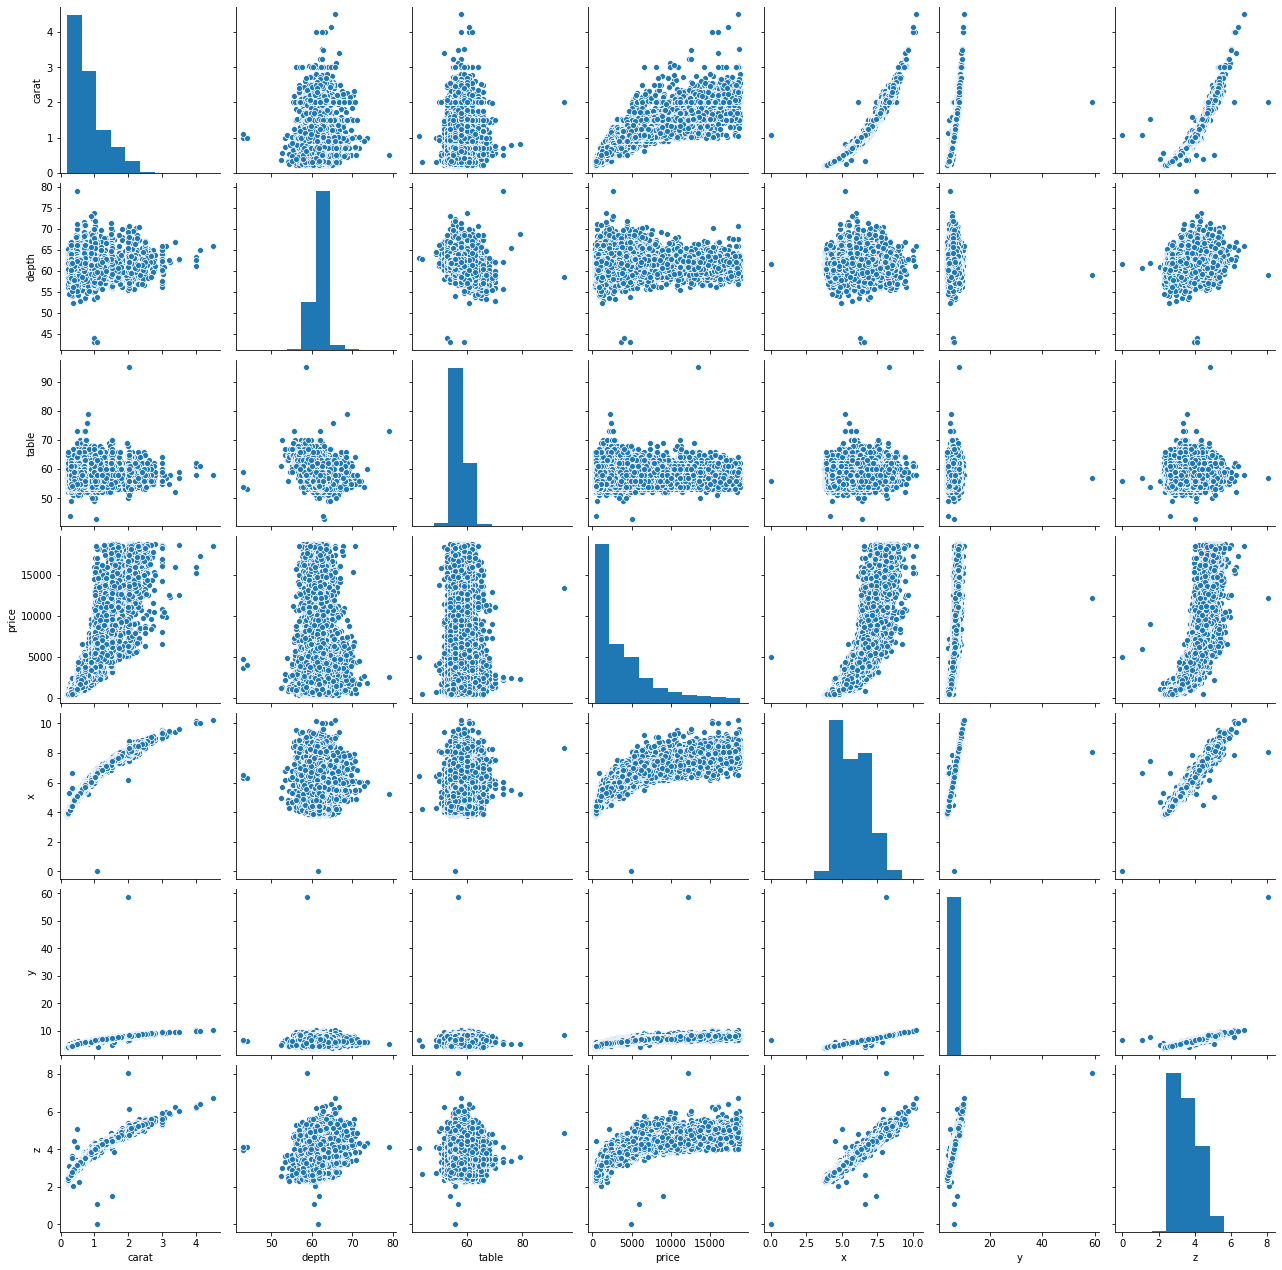

In [97]:
sns.pairplot(data=df);

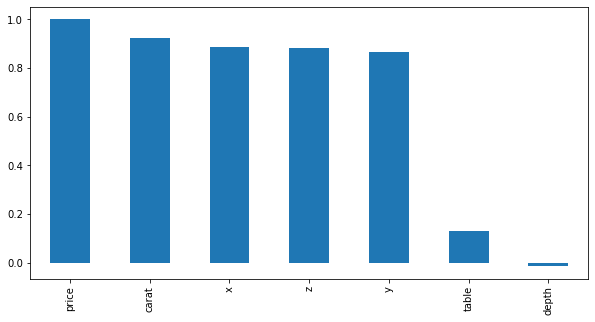

In [98]:
## Correlation between numerical variables and price

correl=df.corr()
plt.figure(figsize=(10,5))
correl['price'].sort_values(ascending=False).plot(kind='bar')

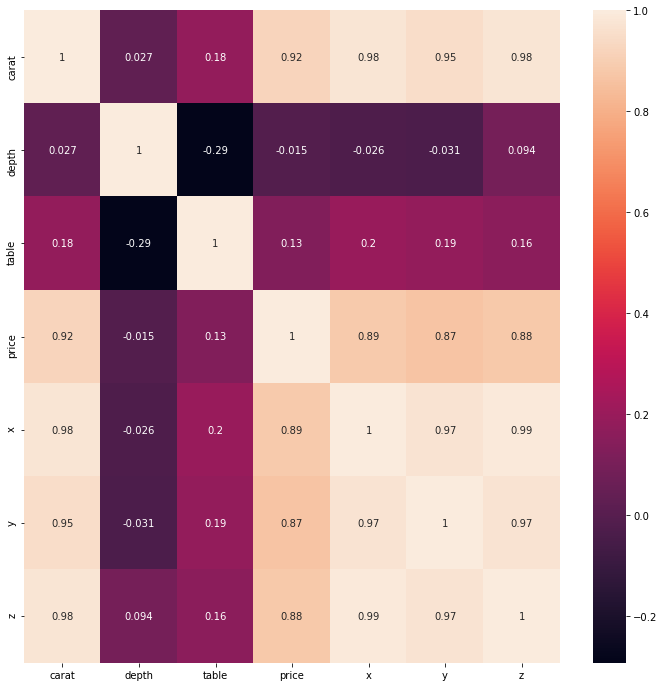

In [99]:
# Heatmap

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

#### 1. x,y,z have a very strong correlation with price (>0.85) and even each others.
#### 2. depth (which comes from x,y,z) doesn't have correlation with price it have inversely correlation.
#### 3. carat has a strong correlation with price (0.92)
#### 4. table has no correlation with any variable.

# CARAT ANALYSIS

count    40451.000000
mean         0.797666
std          0.475509
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          4.500000
Name: carat, dtype: float64


Text(0.5, 0, 'Weight')

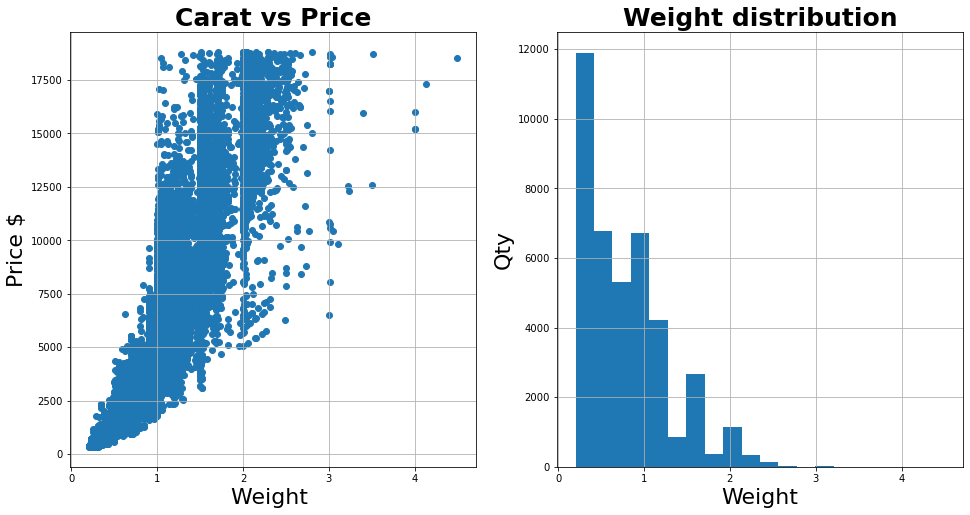

In [100]:
##################### Analysis about dimond carat and the price

print(df['carat'].describe())
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(16,8))
x=df['carat']
y=df['price']
ax[0].scatter(x,y)
ax[0].grid(True)
ax[0].set_title('Carat vs Price',fontweight='bold', fontsize=25)
ax[0].set_ylabel('Price $', fontsize=22)
ax[0].set_xlabel('Weight ', fontsize=22)
ax[0].set_yscale('linear')
ax[0].set_xscale('linear')

ax[1].hist(x, bins=20)
ax[1].grid(True)
ax[1].set_title('Weight distribution',fontweight='bold', fontsize=25)
ax[1].set_ylabel('Qty', fontsize=22)
ax[1].set_xlabel('Weight', fontsize=22)


### In this chart we can see
###        - A weight concentration in 1.0, 1.5 and 2.0 according to the price (maybe an standard weights)
###        - The more diamond weight, the higher price
###        - From 0.5 weight on, the price could be very different. For weight 1 the price vary between less than 2500 to 18000.
###        - It seem the price increarse like a cuadratic function (several times)
###        - The weight distribution is concentrated in the small weights (less than 1 (75%))

# CUT ANALYSIS

count     40451
unique        5
top       Ideal
freq      16220
Name: cut, dtype: object


Text(0.5, 0, 'Cut')

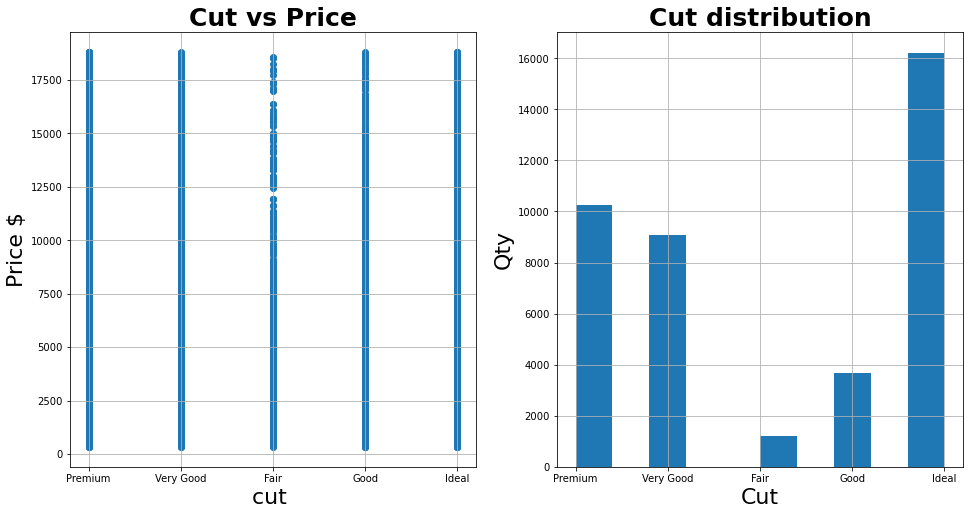

In [101]:
## Now we are goinf to analyse the cut with price

print(df['cut'].describe())

fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(16,8))
x=df['cut']
y=df['price']
ax[0].scatter(x,y)
ax[0].grid(True)
ax[0].set_title('Cut vs Price',fontweight='bold', fontsize=25)
ax[0].set_ylabel('Price $', fontsize=22)
ax[0].set_xlabel('cut ', fontsize=22)
ax[0].set_yscale('linear')

ax[1].hist(x)
ax[1].grid(True)
ax[1].set_title('Cut distribution',fontweight='bold', fontsize=25)
ax[1].set_ylabel('Qty', fontsize=22)
ax[1].set_xlabel('Cut', fontsize=22)




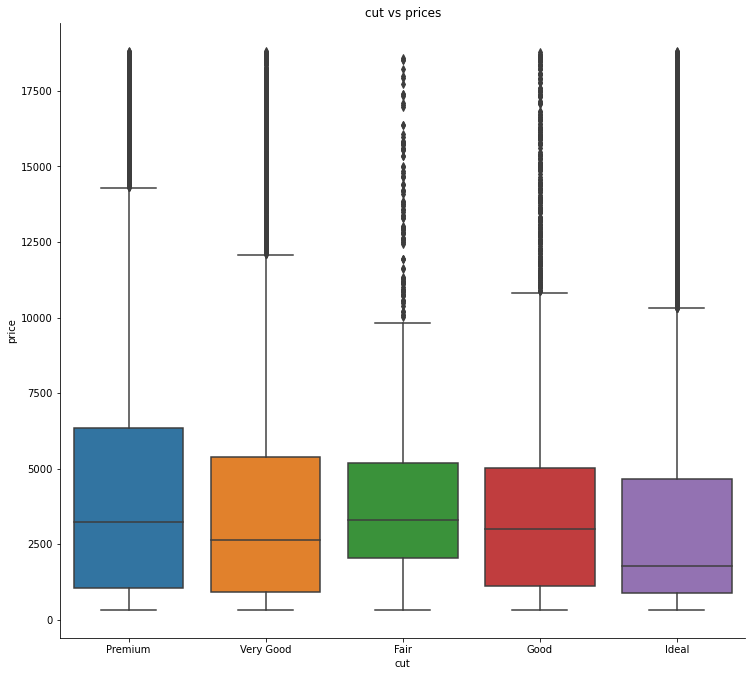

In [102]:

sn=sns.catplot(x='cut',y='price', kind='box', data=df, orient='v')
sn.set(title='cut vs prices')
sn.fig.set_figwidth(12)
sn.fig.set_figheight(10)

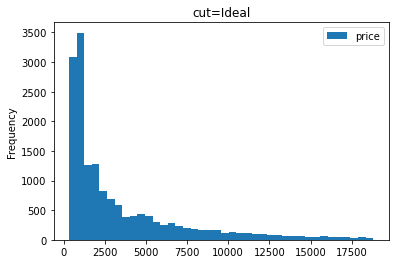

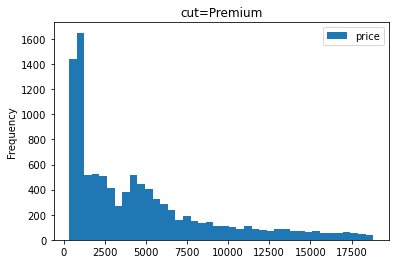

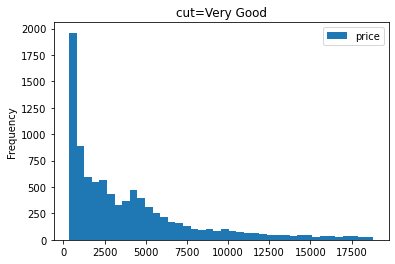

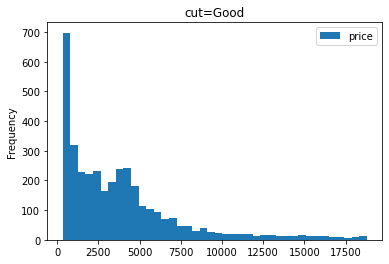

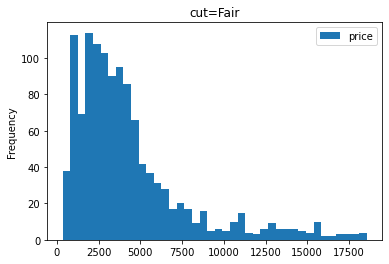

In [103]:
df[(df['cut']=='Ideal')][['cut','price']].plot.hist(title='cut=Ideal', bins=40)
df[(df['cut']=='Premium')][['cut','price']].plot.hist(title='cut=Premium', bins=40)
df[(df['cut']=='Very Good')][['cut','price']].plot.hist(title='cut=Very Good', bins=40)
df[(df['cut']=='Good')][['cut','price']].plot.hist(title='cut=Good', bins=40)
df[(df['cut']=='Fair')][['cut','price']].plot.hist(title='cut=Fair', bins=40)

### 1. In general we can say that the cut is not a big influencer on price.
### 2. We can highlight that the best cut (Ideal) is the cut with the lowest average price.
### 3. Besides the better cuts (Ideal, Premium, Very Good) are the most used.

# COLOR ANALYSIS

count     40451
unique        7
top           G
freq       8454
Name: color, dtype: object
['J' 'H' 'G' 'D' 'F' 'E' 'I']


Text(0.5, 0, 'Color')

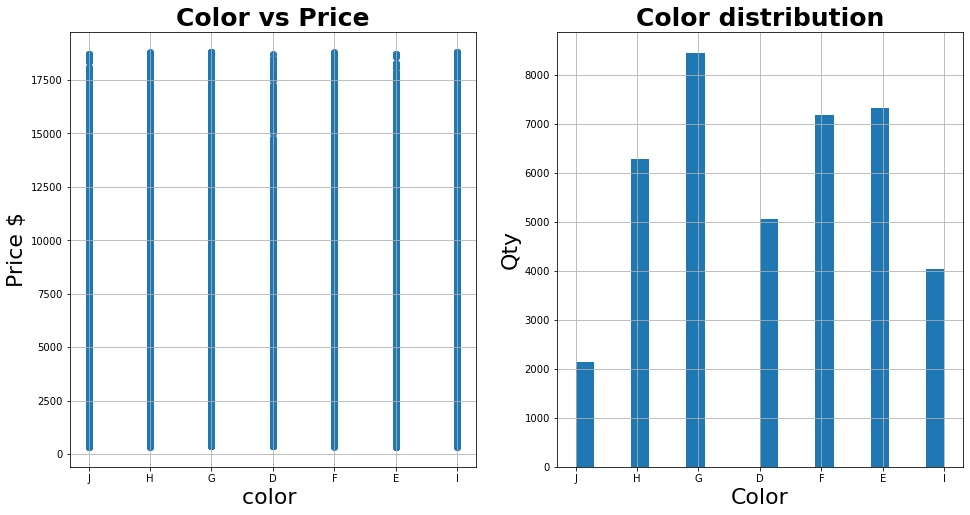

In [104]:
print(df['color'].describe())
print(df['color'].unique())
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(16,8))
x=df['color']
y=df['price']
ax[0].scatter(x,y)
ax[0].grid(True)
ax[0].set_title('Color vs Price',fontweight='bold', fontsize=25)
ax[0].set_ylabel('Price $', fontsize=22)
ax[0].set_xlabel('color ', fontsize=22)
ax[0].set_yscale('linear')

ax[1].hist(x, bins=20)
ax[1].grid(True)
ax[1].set_title('Color distribution',fontweight='bold', fontsize=25)
ax[1].set_ylabel('Qty', fontsize=22)
ax[1].set_xlabel('Color', fontsize=22)


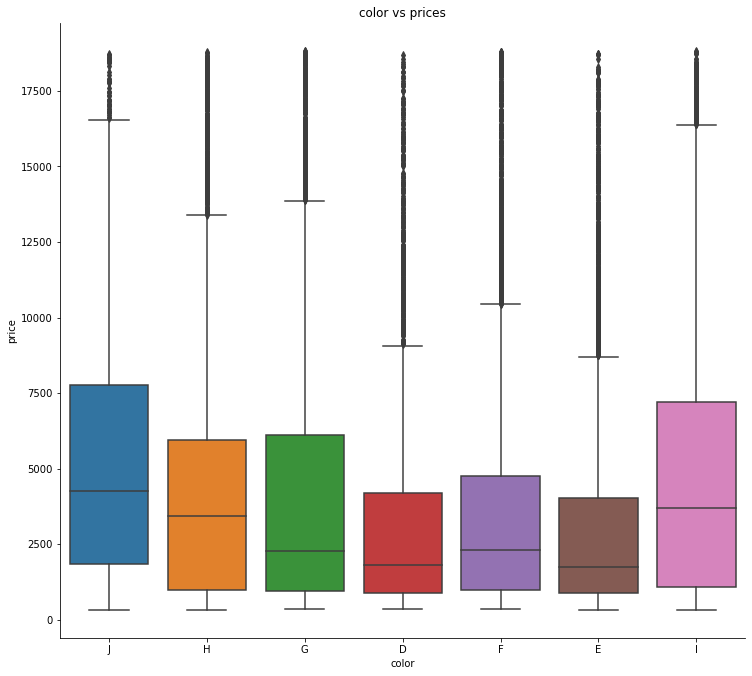

In [105]:
sn=sns.catplot(x='color',y='price', kind='box', data=df, orient='v')
sn.set(title='color vs prices')
sn.fig.set_figwidth(12)
sn.fig.set_figheight(10)

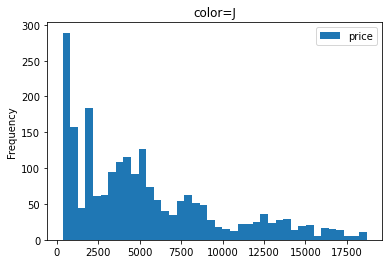

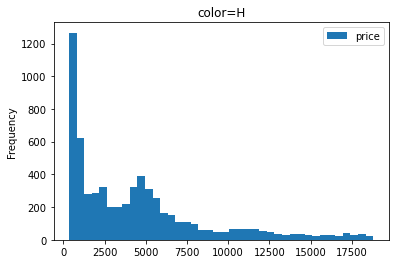

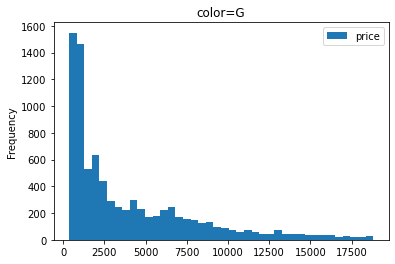

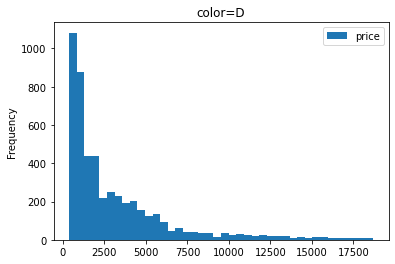

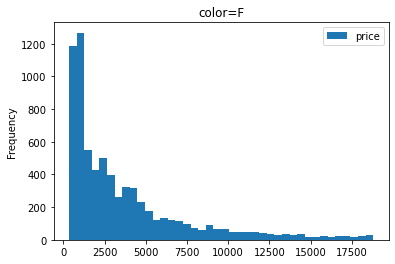

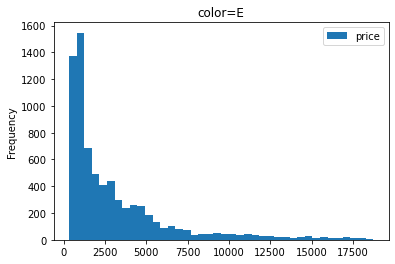

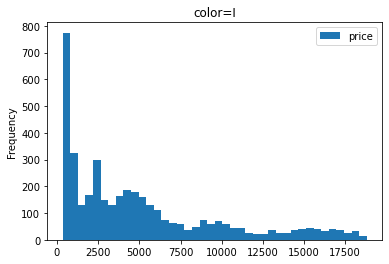

In [106]:
df[(df['color']=='J')][['color','price']].plot.hist(title='color=J', bins=40)
df[(df['color']=='H')][['color','price']].plot.hist(title='color=H', bins=40)
df[(df['color']=='G')][['color','price']].plot.hist(title='color=G', bins=40)
df[(df['color']=='D')][['color','price']].plot.hist(title='color=D', bins=40)
df[(df['color']=='F')][['color','price']].plot.hist(title='color=F', bins=40)
df[(df['color']=='E')][['color','price']].plot.hist(title='color=E', bins=40)
df[(df['color']=='I')][['color','price']].plot.hist(title='color=I', bins=40)

### 1. In general we can say that the color is not a big influencer on price.
### 2. Besides the mor expensive color are I and J, and they are the less used color (maybe because are the most expensive).

# CLARITY ANALYSIS

count     40451
unique        8
top         SI1
freq       9749
Name: clarity, dtype: object
['VS2' 'VS1' 'SI1' 'SI2' 'IF' 'VVS1' 'VVS2' 'I1']


Text(0.5, 0, 'clarity')

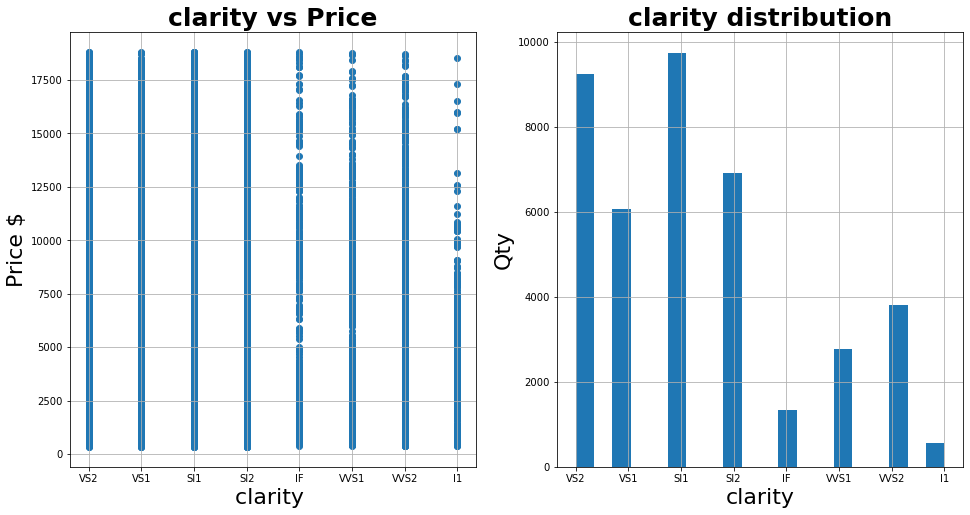

In [107]:
print(df['clarity'].describe())
print(df['clarity'].unique())
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(16,8))
x=df['clarity']
y=df['price']
ax[0].scatter(x,y)
ax[0].grid(True)
ax[0].set_title('clarity vs Price',fontweight='bold', fontsize=25)
ax[0].set_ylabel('Price $', fontsize=22)
ax[0].set_xlabel('clarity ', fontsize=22)
ax[0].set_yscale('linear')

ax[1].hist(x, bins=20)
ax[1].grid(True)
ax[1].set_title('clarity distribution',fontweight='bold', fontsize=25)
ax[1].set_ylabel('Qty', fontsize=22)
ax[1].set_xlabel('clarity', fontsize=22)

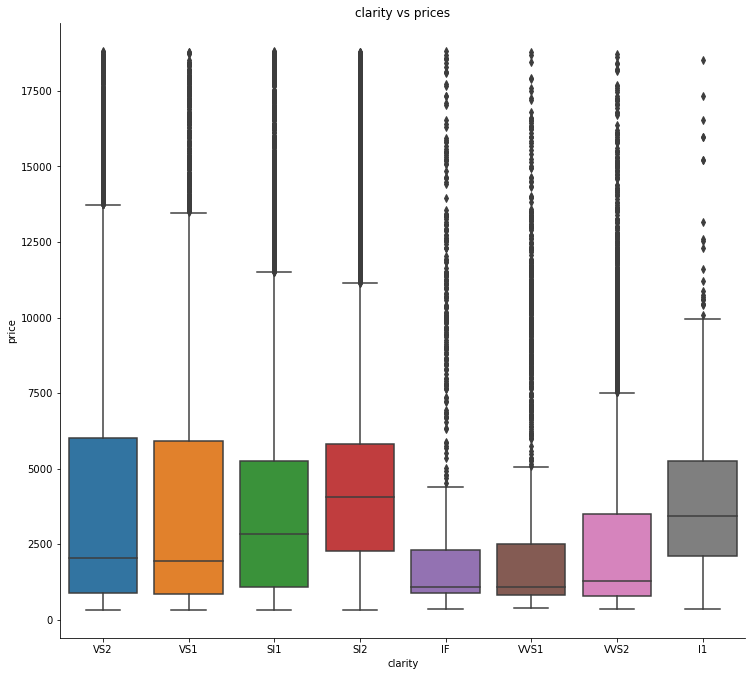

In [108]:
sn=sns.catplot(x='clarity',y='price', kind='box', data=df, orient='v')
sn.set(title='clarity vs prices')
sn.fig.set_figwidth(12)
sn.fig.set_figheight(10)

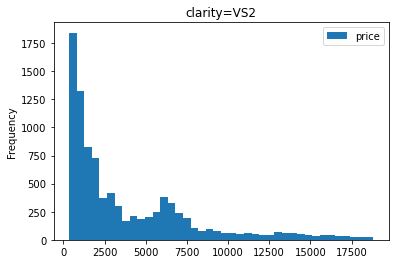

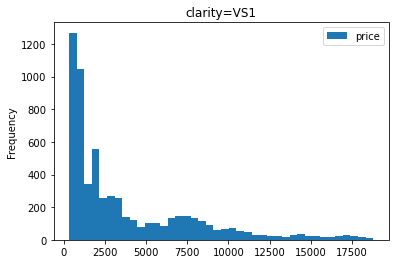

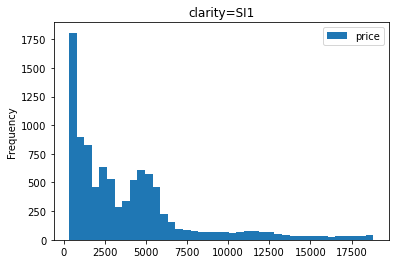

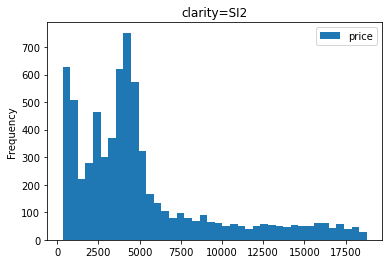

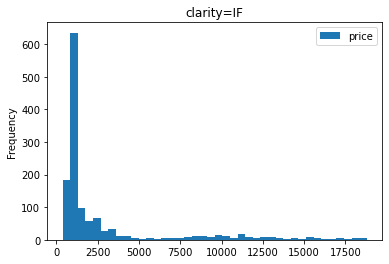

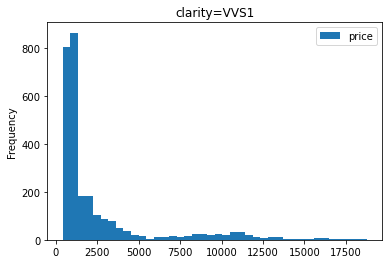

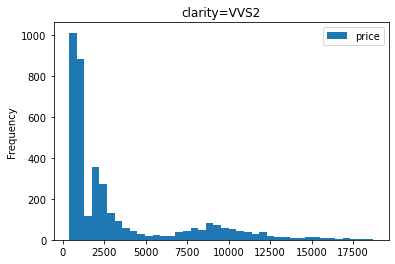

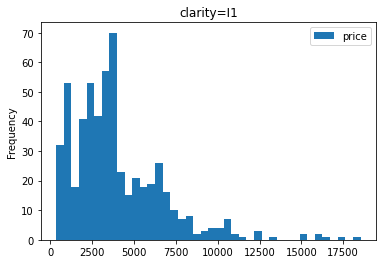

In [109]:
df[(df['clarity']=='VS2')][['clarity','price']].plot.hist(title='clarity=VS2', bins=40)
df[(df['clarity']=='VS1')][['clarity','price']].plot.hist(title='clarity=VS1', bins=40)
df[(df['clarity']=='SI1')][['clarity','price']].plot.hist(title='clarity=SI1', bins=40)
df[(df['clarity']=='SI2')][['clarity','price']].plot.hist(title='clarity=SI2', bins=40)
df[(df['clarity']=='IF')][['clarity','price']].plot.hist(title='clarity=IF', bins=40)
df[(df['clarity']=='VVS1')][['clarity','price']].plot.hist(title='clarity=VVS1', bins=40)
df[(df['clarity']=='VVS2')][['clarity','price']].plot.hist(title='clarity=VVS2', bins=40)
df[(df['clarity']=='I1')][['clarity','price']].plot.hist(title='clarity=I1', bins=40)

In [110]:
df['clarity'].unique()

array(['VS2', 'VS1', 'SI1', 'SI2', 'IF', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

### 1. There is no clear relation between clarity and price
### 2. The most used clarity are VS2, VS1, SI1 and SI2.

# DEPT ANALYSIS

count    40451.000000
mean        61.752805
std          1.431535
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64


Text(0.5, 0, 'Depth')

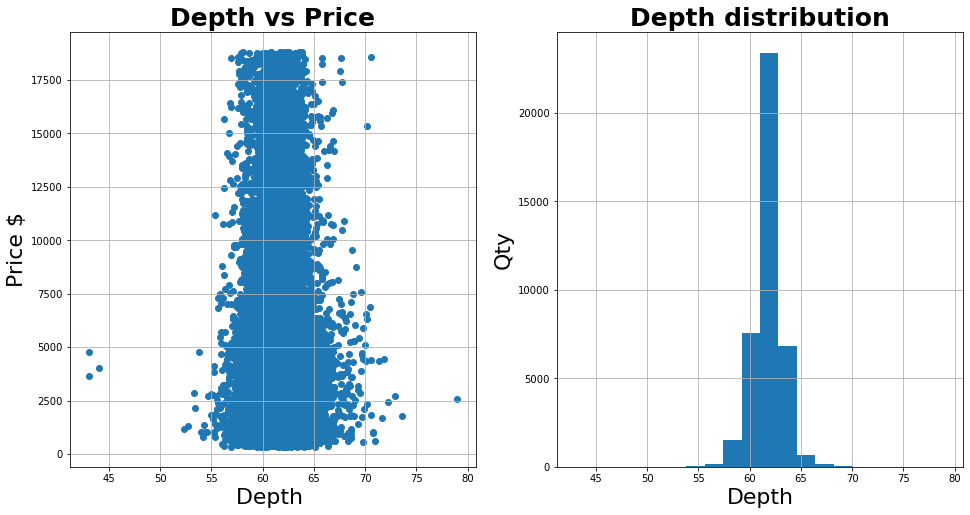

In [111]:
##################### Analysis about dimond DEPTH and the price

print(df['depth'].describe())
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(16,8))
x=df['depth']
y=df['price']
ax[0].scatter(x,y)
ax[0].grid(True)
ax[0].set_title('Depth vs Price',fontweight='bold', fontsize=25)
ax[0].set_ylabel('Price $', fontsize=22)
ax[0].set_xlabel('Depth ', fontsize=22)
ax[0].set_yscale('linear')
ax[0].set_xscale('linear')

ax[1].hist(x, bins=20)
ax[1].grid(True)
ax[1].set_title('Depth distribution',fontweight='bold', fontsize=25)
ax[1].set_ylabel('Qty', fontsize=22)
ax[1].set_xlabel('Depth', fontsize=22)


### 1. There is no relation between price and depth. The price can vary heavily for same depth.
### 2. There is a slightly inverse correlation with price

# TABLE ANALYSIS

count    40451.000000
mean        57.445732
std          2.233055
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64


Text(0.5, 0, 'table')

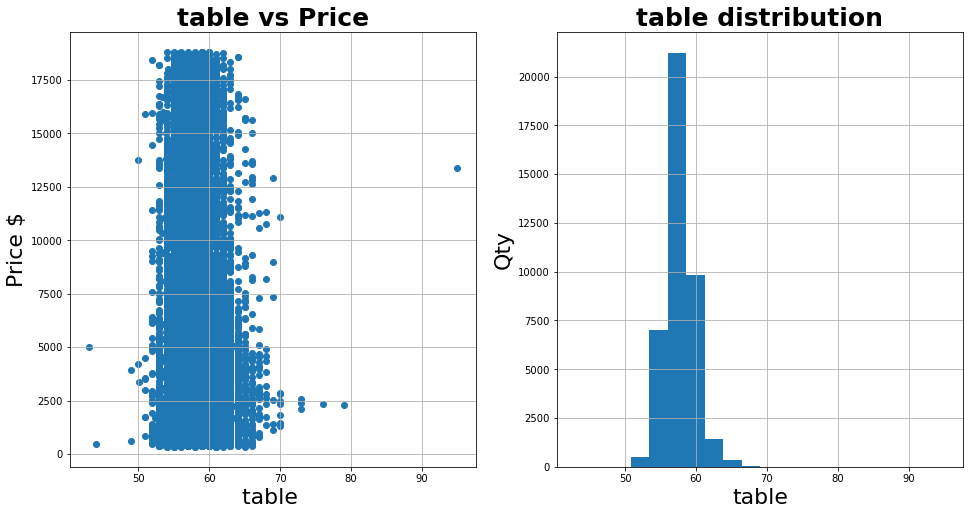

In [112]:
##################### Analysis about dimond TABLE and the price

print(df['table'].describe())
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(16,8))
x=df['table']
y=df['price']
ax[0].scatter(x,y)
ax[0].grid(True)
ax[0].set_title('table vs Price',fontweight='bold', fontsize=25)
ax[0].set_ylabel('Price $', fontsize=22)
ax[0].set_xlabel('table ', fontsize=22)
ax[0].set_yscale('linear')
ax[0].set_xscale('linear')

ax[1].hist(x, bins=20)
ax[1].grid(True)
ax[1].set_title('table distribution',fontweight='bold', fontsize=25)
ax[1].set_ylabel('Qty', fontsize=22)
ax[1].set_xlabel('table', fontsize=22)


### 1. There is no relation between price and table. The price can vary heavily for same table.
### 2. There is a slightly correlation with price

# X, Y, Z, DIMENSIONS ANALYSIS

### Due to the high correlation the three dimensions with price and with each others, we are going to create the volume variable (x*y*z)

In [113]:
df['volume']=df['x']*df['y']*df['z']
df

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1.21,Premium,J,VS2,62.4,58.0,4268,6.83,6.79,4.25,197.096725
1,0.32,Very Good,H,VS2,63.0,57.0,505,4.35,4.38,2.75,52.395750
2,0.71,Fair,G,VS1,65.5,55.0,2686,5.62,5.53,3.65,113.436890
3,0.41,Good,D,SI1,63.8,56.0,738,4.68,4.72,3.00,66.268800
4,1.02,Ideal,G,SI1,60.5,59.0,4882,6.55,6.51,3.95,168.429975
...,...,...,...,...,...,...,...,...,...,...,...
40450,1.34,Ideal,G,VS1,62.7,57.0,10070,7.10,7.04,4.43,221.429120
40451,2.02,Good,F,SI2,57.1,60.0,12615,8.31,8.25,4.73,324.276975
40452,1.01,Ideal,H,SI1,62.7,56.0,5457,6.37,6.42,4.01,163.990554
40453,0.33,Ideal,J,VS1,61.9,54.3,456,4.45,4.47,2.76,54.900540


count    40451.000000
mean       129.887923
std         78.918552
min          0.000000
25%         64.955169
50%        114.725487
75%        170.890200
max       3840.598060
Name: volume, dtype: float64


Text(0.5, 0, 'volume')

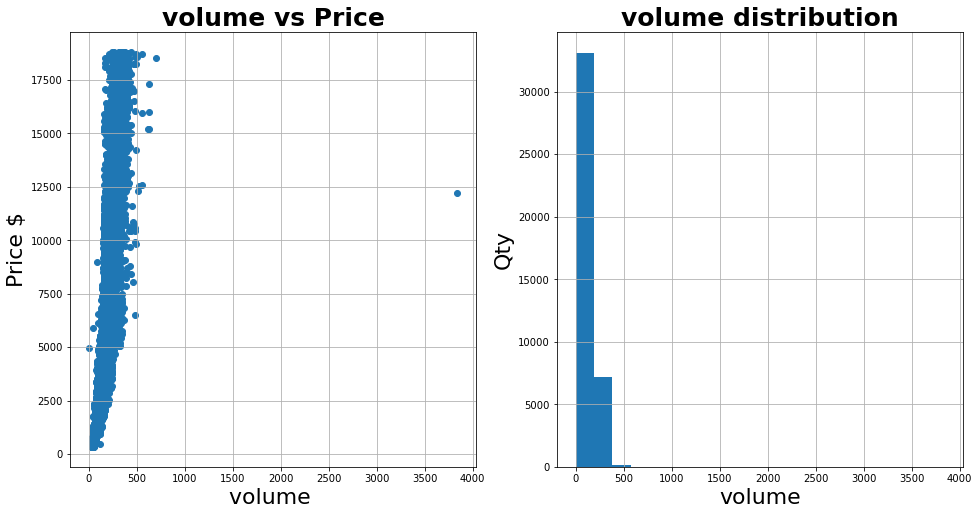

In [114]:
##################### Analysis about diamond VOLUME and the price

print(df['volume'].describe())
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(16,8))
x=df['volume']
y=df['price']
ax[0].scatter(x,y)
ax[0].grid(True)
ax[0].set_title('volume vs Price',fontweight='bold', fontsize=25)
ax[0].set_ylabel('Price $', fontsize=22)
ax[0].set_xlabel('volume ', fontsize=22)
ax[0].set_yscale('linear')
ax[0].set_xscale('linear')

ax[1].hist(x, bins=20)
ax[1].grid(True)
ax[1].set_title('volume distribution',fontweight='bold', fontsize=25)
ax[1].set_ylabel('Qty', fontsize=22)
ax[1].set_xlabel('volume', fontsize=22)


In [123]:
# It seems there is a wrong data in one row (index=14708)

df[df['volume']>3800]

,carat,cut,color,clarity,depth,table,price,x,y,z,volume


In [124]:
# Lets delete this record

df.drop(df[df['volume']>3800].index, inplace=True)



count    40448.000000
mean       129.798236
std         76.733803
min          0.000000
25%         64.943424
50%        114.725487
75%        170.890200
max        698.455296
Name: volume, dtype: float64


Text(0.5, 0, 'volume')

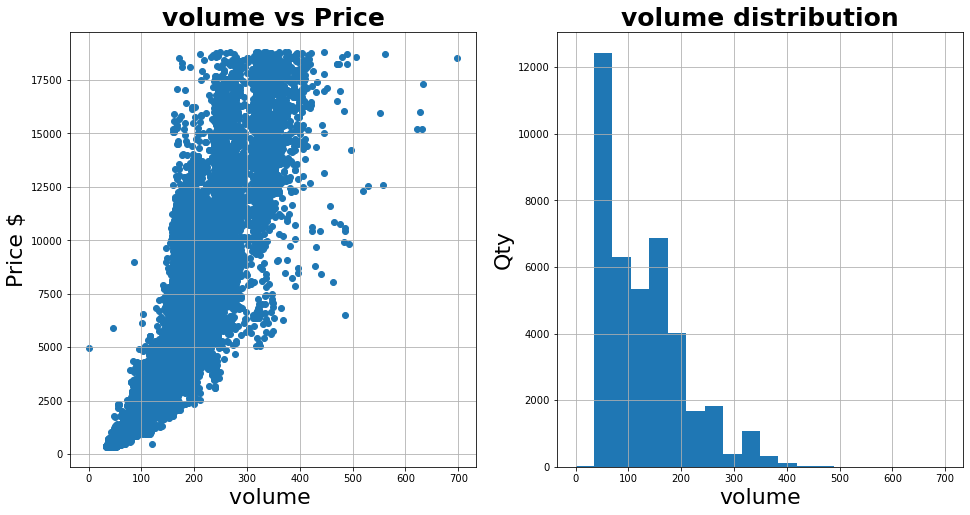

In [125]:
##################### Analysis about diamond VOLUME and the price

print(df['volume'].describe())
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(16,8))
x=df['volume']
y=df['price']
ax[0].scatter(x,y)
ax[0].grid(True)
ax[0].set_title('volume vs Price',fontweight='bold', fontsize=25)
ax[0].set_ylabel('Price $', fontsize=22)
ax[0].set_xlabel('volume ', fontsize=22)
ax[0].set_yscale('linear')
ax[0].set_xscale('linear')

ax[1].hist(x, bins=20)
ax[1].grid(True)
ax[1].set_title('volume distribution',fontweight='bold', fontsize=25)
ax[1].set_ylabel('Qty', fontsize=22)
ax[1].set_xlabel('volume', fontsize=22)


### 1. The volume have a clear strong correlation with price
